**Sequence Models**

Zamana bağlı modellerdir.

Hava alanındaki yolcu sayısı ölçülmek istendiğinde, yolcu sayısı zamanla değişen bir modeldir.

Apple Siri ya da Google voice search gibi speech recognition, Natural Language Process(NLP), music recognition alanlarında kullanılır.

Sentiment classification (duygu sınıflandırma) örneğinde;

"dünyadaki en güzel ders bu derstir."

cümlesi ANN ile eğitildiğinde olumlu ya da olumsuz olmak gibi binary classification outputu verir.

Ancak ders kelimesi ANN algoritmasına koyulduğunda bu kelime hiçbir şey ifade etmeyecektir.

İnsan beynine de sadece ders kelimesi koyulduğunda bu kelimenin olumlu ya da olumsuz bir yorum olduğuna dair bir çıkarımda bulunamaz.

Bu yüzden RNN (Recurrent Neural Network) kullanılır.

RNN, kendinden önceki short memory'i (güzel,en, dünyadaki) de hatırlar.

ders kelimesine geldiği zaman, geriye dönüp dersi niteleyen kelimeleri de memory'sinde tutabilir.

Yani "dünyadaki en güzel ders bu derstir." cümlesi daha önceden RNN algoritması tarafından görülmüştür ve ders kelimesi geldiğinde kendisinden önceki kelimeleri de hafızasında tuttuğundan olumlu bir şekilde çıkarım yapar.

# **Recurrent Neural Network**

RNN aldığı inputlardan önemli olanları hatırlar. Böylelikle gelecekle ilgili doğru tahmin yapılmasını sağlanır.

RNN'in memory'si vardır. Geçmişe dayalı gelecekle ilgili prediction ya da classify yapabilirler.

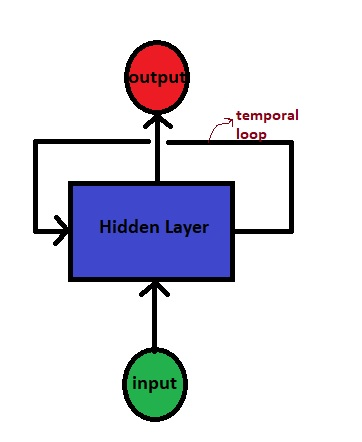

RNN sadece outputları değil kendisini de besler.

Hidden layer nodelardan oluşur.

Bu nodelar kendi kendisini besleyen temporal loop'lardan oluşur.

Short term memory'e sahiptirler. Bir önceki node'da olanları hatırlar.

RNN aldığı bir input'u output vermesine rağmen kendisini o inputla besler ve unutmaz. Bir sonraki node'a ya da layer'a geçtiğinde daha önceden öğrendiği hafızasındadır.

İnsan hafızasında geçmişte bir şeyler öğrenilir ve yeni öğrenilenler bunların üzerine kurulur. 

RNN'de geçmişte bir şeyler öğrenip, gelecekte bu öğrendikleriyle bağdaştırma yapar.

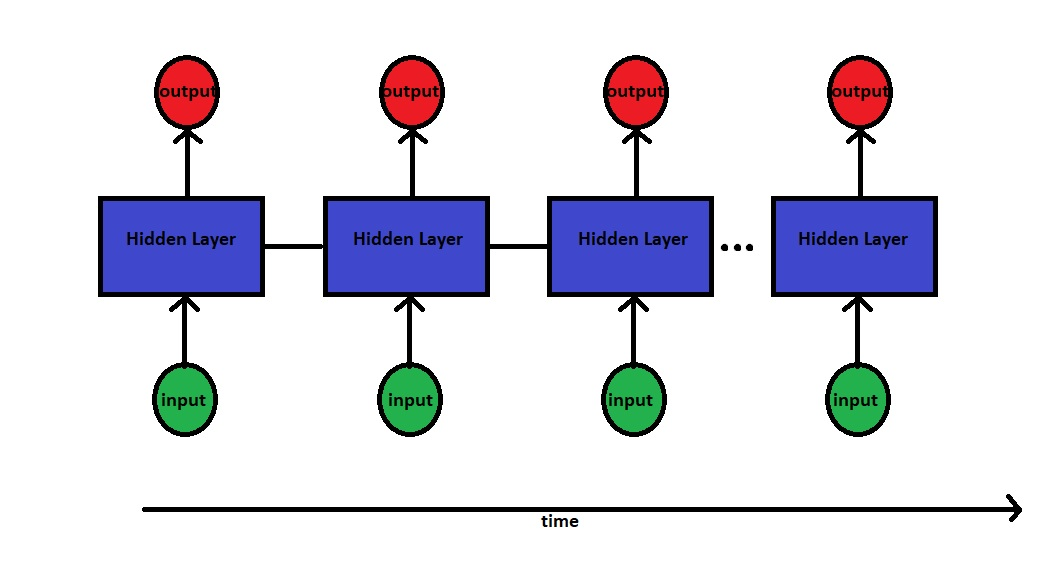

Bir input'tan bir output elde edilmiştir. Ancak burada hatırlanması gereken önemli yerler bir sonraki layer'a iletilir.

Mesela bir filmi izlerken basketbol sahası gösterildiği anda film kesildiğinde, RNN algoritması daha önce hafızasına kaydetmişse orada basketbol oynanacağını tahmininde bulunur. Ancak ANN algoritmasının bir hafızası olmadığından böyle bir tahminde bulunamaz.

Örnek RNN yapılarına bakıldığında;

**One to Many**

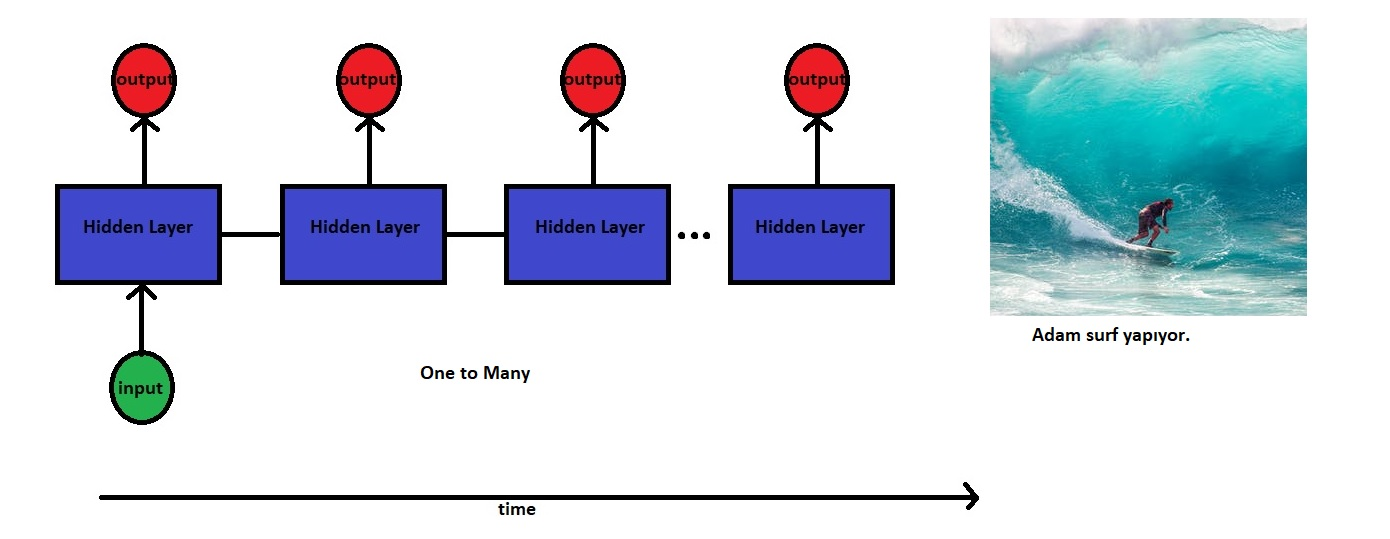

Input x*x'lik piksellerden oluşan bir görseldir.

Output ise bu görselden yapılan çıkarım olan "Adam surf yapıyor." cümlesidir.

**Many to One**

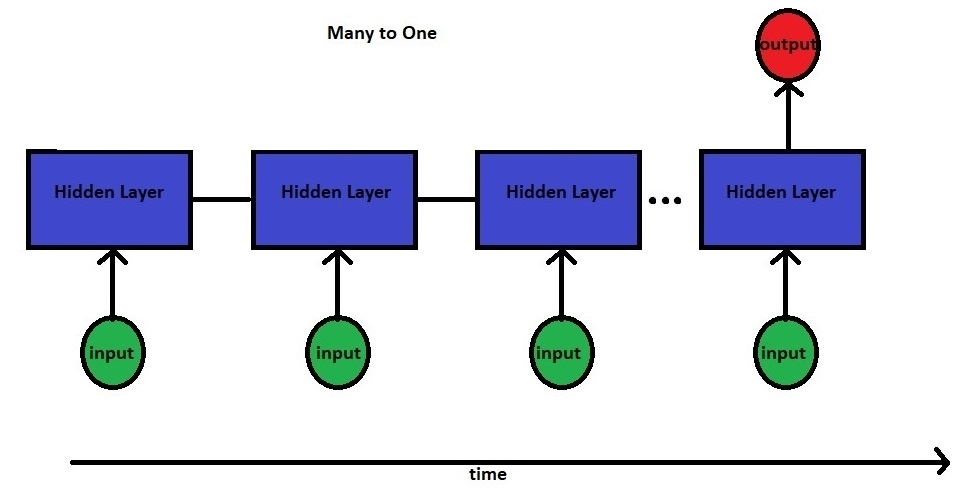

Input bir cümle, output ise o cümleden çıkarılan duygudur.

Mesela %90 oranında bu cümle olumludur diye bir çıkarımda bulunulabilir.

**Many to Many**

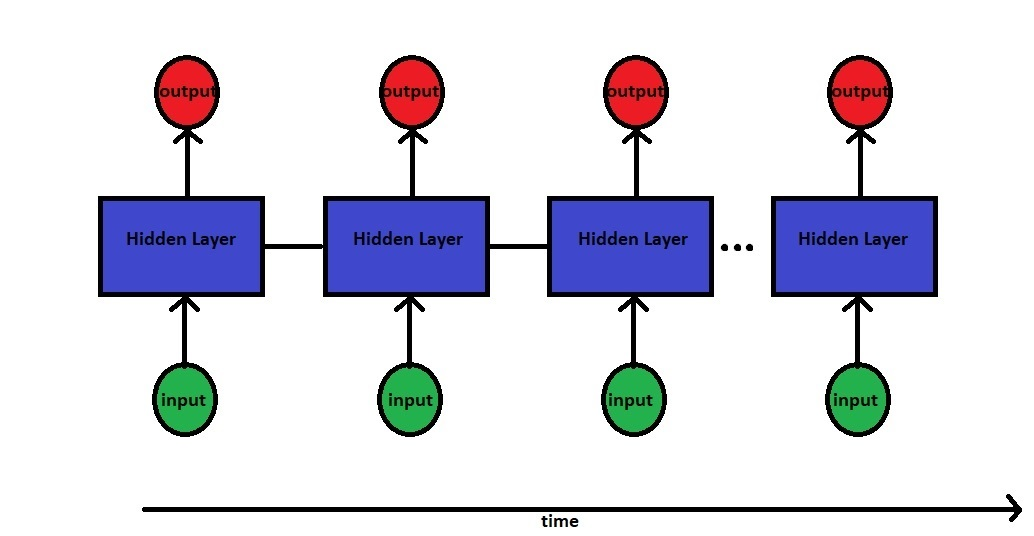

Mesela google translate ile İngilizce'den bir cümleyi Türkçe'yi çevirirken birden çok input ve output vardır ve anlamlı bir cümle oluşturmak için de bir önceki kelimenin hatırlanması gerekir.

RNN short term memory'e sahipken, LSTM long term memory'e sahip olabilir.

Daha önce de belirtildiği gibi RNN'i CNN ve ANN'den ayıran memory'e sahip olmasıdır.

"ŞEVVAL" diye bir string olsun. ANN algoritması 'A' harfine gelindikten sonra bir sonraki harfi bilemez. Çünkü memory'si olmadığı için geçmiş "ŞEVV" harflerini bilip, 'A' harfi ile birleştirip, bir sonraki harfin 'L' olacağını tahnin edemez. Ancak RNN ile bu tahmin edilir.

Gradient Descent yöntemiyle weightlerin türevine göre minimum costa ulaşmak amaçlanır.

**Exploiding Gradients:** Türevin çok fazla olmasıdır. Bu durumda weightler gereksiz yere önem kazanır.

**Vanishing Gradients:** Türevin çok az olmasıdır. Bu durumda weight değerindeki değişimler çok az olacağından ve model weight ve bias parametreleriyle öğrendiğinden, öğrenme çok yavaş gerçekleşir.

**Implementing Recurrent Neural Network with Keras**

* Loading and Preprocessing Data
* Create RNN Model
* Predictions and Visualising RNN Model

Kullanılacak data Stoke Price (Borsa)'dır.

Borsada gelecekle ilgili prediction yapılacaktır.

**Loading and Preprocessing Data**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dataset_train = pd.read_csv("/content/drive/MyDrive/data/Stock_Price_Train.csv")

In [ ]:
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
dataset_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


Her feature'da 1258 sample bulunmaktadır.

In [ ]:
train = dataset_train.loc[:, ["Open"]].values #values methoduyla pandas series numpy array'e çevrilmiştir.
train

array([[325.25],
       [331.27],
       [329.83],
       ...,
       [793.7 ],
       [783.33],
       [782.75]])

Open feature'ı kullanılarak borsanın açılışına bakılacaktır.

In [ ]:
#MinMaxScaler = X-Xmin / Xmax-Xmin
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
train_scaled = scaler.fit_transform(train) #fit ile datadaki samplelar 0-1 arasına getirilir.
train_scaled                               #transform ile bir variable'a eşitlenir.

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

Open feature'ındaki veriler çok yüksek olduğundan baskınlık kurabilir.

MinMaxScaler methoduyla sample'ların range'ı 0-1 aralığına getirilerek normalization yapılmıştır.

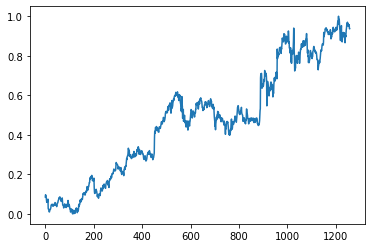

In [ ]:
plt.plot(train_scaled)
plt.show()

In [ ]:
# Creating a data structure with 50 timesteps and 1 output
X_train = []
y_train = []
timesteps = 50
for i in range(timesteps, 1258):
    X_train.append(train_scaled[i-timesteps:i, 0])
    y_train.append(train_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train) 
#X_train ve y_train pandas series'ten numpy array'e çevrilmiştir.

In [ ]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.03675869, 0.04486941,
        0.05065481],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.04486941, 0.05065481,
        0.05214302],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.05065481, 0.05214302,
        0.05612397],
       ...,
       [0.9313937 , 0.94636878, 0.96569685, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.94636878, 0.96569685, 0.97510976, ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.96569685, 0.97510976, 0.95966962, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [ ]:
X_train.shape

(1208, 50)

Train datası x_train ve y_train olmak üzere ikiye ayrılmalıdır.

x_train -> featurelar

y_train -> predict edilecek değerler

x_train datasına ilk 50 sample alınır, bu 50 sample'ın labelı olarak y_train'e 51. sample koyulur.

Daha sonra teker teker 1 kayarak x_train ve y_train oluşturulur.

Bu şekilde ayrılmasının sebebi train datası artan şekilde olduğundan 50 sample ile bir sonraki 51. sample predict edilebilir. Featurelar ile label ayrılmadığından böyle bir ayrım yapılmıştır.

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.03675869],
        [0.04486941],
        [0.05065481]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.04486941],
        [0.05065481],
        [0.05214302]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.05065481],
        [0.05214302],
        [0.05612397]],

       ...,

       [[0.9313937 ],
        [0.94636878],
        [0.96569685],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.94636878],
        [0.96569685],
        [0.97510976],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.96569685],
        [0.97510976],
        [0.95966962],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

In [ ]:
X_train.shape

(1208, 50, 1)

In [ ]:
y_train

array([0.05214302, 0.05612397, 0.05818885, ..., 0.95725128, 0.93796041,
       0.93688146])

**Create RNN Model**

In [ ]:
# Importing the Keras libraries and packages
from keras.models import Sequential #Sequential methoduyla neural network yapısı oluşturulur.
from keras.layers import Dense      #Dense methoduyla layerlar oluşturulur.
from keras.layers import SimpleRNN
from keras.layers import Dropout    #dropout yöntemiyle input ya da hidden layerdaki bazı nodelar kapatılarak overfitting önlenir.

regressor = Sequential() #Sequential methodu çağrılarak neural network yapısı initialize edilir.
                         #içerisinde layerlar bulunur.

regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True, input_shape = (X_train.shape[1], 1)))
#activation function olarak tanh seçilmiştir.
#tanh function aldığı parametreyi 1 ve -1 arasında bir değere eşitler.
#add methoduyla neural network'e layer eklenir.
#input_shape ile feature size belirtilir.
#kerasta input ve output dimension belirtilmelidir.
#return_sequences bir sonraki katman da RNN layer'ı olduğunda True olur.
#return_sequences False olduğunda son RNN layer'ıdır.

regressor.add(Dropout(0.2))
##dropout'taki threshold 0.20 koyulmuştur.
#dropout yöntemiyle input ya da hidden layerdaki bazı nodelar kapatılarak overfitting önlenir.

#İkinci RNN layer'ı ve dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

#Üçüncü RNN layer'ı ve dropout regularisation
regressor.add(SimpleRNN(units = 50,activation='tanh', return_sequences = True))
regressor.add(Dropout(0.2))

#Dördüncü RNN layer'ı ve dropout regularisation
regressor.add(SimpleRNN(units = 50,return_sequences = False))
regressor.add(Dropout(0.2))

#Output layer
regressor.add(Dense(units = 1,activation = 'sigmoid'))
#output layer 1 node'dan oluştuğu için units = 1 atanır, activation function sigmoid'dir.
#sigmoid function'da 0-1 arasında probabilistic bir değer verir.

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#classifier'ın yani neural network'ün compile edilmesi için optimize edilir.
#binary_crossentropy logistic regression'daki loss function hesabıdır.
#adam (adaptive momentum) optimizasyon algoritmasıdır.learning rate değerini değiştirir.
#Böylelikle öğrenme daha hızlı gerçekleşir.
#mse predictionların gerçek değerlerden ne kadar farklı olduğuna dair bir değer verir.
  
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

#Train datasındaki sample sayısı 1208,
#batch size 32,
#1208/32 = 38 batch,
#Her epoch'ta 38 defa forward backward propagation yapılır.

Epoch 1/100
38/38 [==============================] - 5s 41ms/step - loss: 0.0257
Epoch 2/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0136
Epoch 3/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0098
Epoch 4/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0090
Epoch 5/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0098
Epoch 6/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0076
Epoch 7/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0065
Epoch 8/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0066
Epoch 9/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0064
Epoch 10/100
38/38 [==============================] - 2s 40ms/step - loss: 0.0057
Epoch 11/100
38/38 [==============================] - 2s 42ms/step - loss: 0.0055
Epoch 12/100
38/38 [==============================] - 2s 41ms/step - loss: 0.0055
Epoch 13/100
38/38 [=====

**RNN Prediction and Visualization**

In [ ]:
#Test Data
dataset_test = pd.read_csv('/content/drive/MyDrive/data/Stock_Price_Test.csv')
dataset_test.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"


In [ ]:
real_stock_price = dataset_test.loc[:, ["Open"]].values #values methoduyla pandas series numpy array'e çevrilmiştir.
real_stock_price

array([[778.81],
       [788.36],
       [786.08],
       [795.26],
       [806.4 ],
       [807.86],
       [805.  ],
       [807.14],
       [807.48],
       [807.08],
       [805.81],
       [805.12],
       [806.91],
       [807.25],
       [822.3 ],
       [829.62],
       [837.81],
       [834.71],
       [814.66],
       [796.86]])

Open feature'ı kullanılacaktır.

In [ ]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
#train datasıyla test datası birleştirilir.

In [ ]:
#Train datasındaki değerlere normalization yapıldığı için test datasına da yapılmıştır.
inputs = dataset_total[len(dataset_total) - len(dataset_test) - timesteps:].values.reshape(-1,1)
inputs = scaler.transform(inputs)  #min max scaler
inputs

array([[0.97510976],
       [0.95966962],
       [0.97808617],
       [1.        ],
       [0.98076494],
       [0.97083116],
       [0.98450406],
       [0.96054394],
       [0.9371419 ],
       [0.92841729],
       [0.90804747],
       [0.8771858 ],
       [0.92153434],
       [0.93809063],
       [0.93165414],
       [0.95254483],
       [0.88812412],
       [0.88637547],
       [0.87032145],
       [0.88563137],
       [0.90743359],
       [0.91571173],
       [0.89941588],
       [0.91805566],
       [0.9089404 ],
       [0.9024853 ],
       [0.89456061],
       [0.91600938],
       [0.9132934 ],
       [0.88979835],
       [0.86589404],
       [0.89030062],
       [0.90335962],
       [0.89642086],
       [0.91777662],
       [0.93176576],
       [0.94114145],
       [0.95762334],
       [0.96413424],
       [0.96402262],
       [0.96971501],
       [0.95077759],
       [0.96294367],
       [0.96123223],
       [0.95475854],
       [0.95204256],
       [0.95163331],
       [0.957

In [ ]:
X_test = []
for i in range(timesteps, 70):
    X_test.append(inputs[i-timesteps:i, 0])
X_test = np.array(X_test) #x_test numpy array yapılır.
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test) #prediction
predicted_stock_price = scaler.inverse_transform(predicted_stock_price) 
#gerçek değerler görülmek istendiği için scale edilmiş değerler tersine çevrilir.

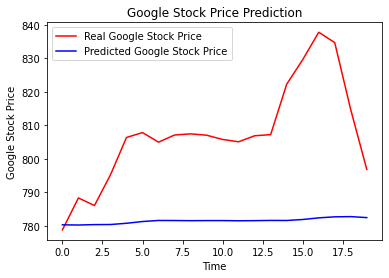

In [ ]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

**Long Short Term Memory (LSTM)**

RNN'in özelleşmiş yapısıdır.

LSTM'de RNN'den farklı olarak long term memory bulunur.

RNN'de sadece short term memory bulunur.

**sigmoid layer:** Sigmoid function memory'den bir şeyi hatırlamak için yada unutmak için kullanılır. 1 yada 0'dır.

**x:** scaling bilgisi (sigmoid function'dan çıkan değer 0 ise bilgi unutulur, 1 ise bir sonraki yapıya aktarılır.)

**tanh:** tanh activation function'dan çıkan -1 ve 1 olduğundan dolayı orta değeri türevi alınırken hemen 0'a ulaşmaz. Böylelikle vanishing gradient(yavaş öğrenme/çok küçük gradient) problemini çözer.

**h(t-1):** bir önceki layer'dan gelen output'tur.

**x(t):** mevcut bilgi

**c(t-1):** bir önceki layer'dan gelen memory

**c(t):** güncellenmiş memory

**h(t) :** output 

**h(t-1):** bir önceki layerdaki output

c(t-1)'den c(t)'e uzanan bir memory pipeline vardır.

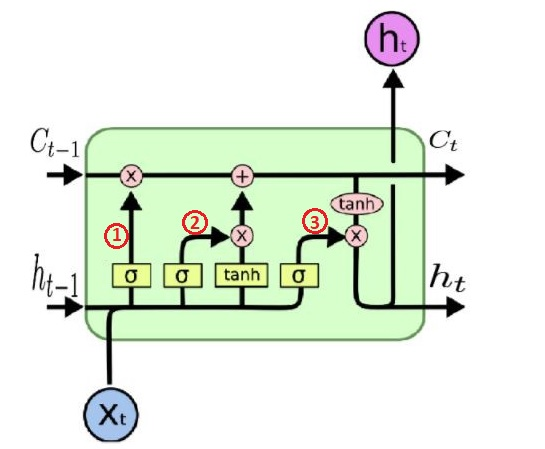

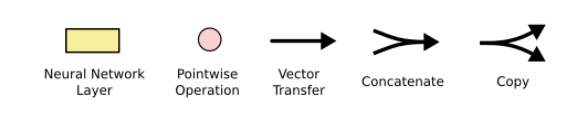

LSTM'de 3 yapı bulunur.

**1) Forget Gate:** input olarak x(t) ve h(t-1) alır. Bir önceki layer gelen output'u ve mevcut bilgiyi sigmoid function'a sokar. Sigmoid function değeri 0 ise bilgi unutulur, 1 ise bir sonraki yapıya aktarılır.

**2) Input Gate:** input olarak x(t) ve h(t-1) alır. Bu inputlar sigmoid ve tanh activation function'a sokulur. Sigmoid ve tanh function değerleri çarpılarak  Hangi bilginin memory de depolanıp hangi bilginin depolanmayacağına karar verilir. Sigmoid 0 ise depolanmaz, 1 ise depolanır.

**3) Output Gate:** İnputlar sigmoid function'a koyularak, hangi bilginin output (h(t)) olacağı belirlenir.

**Implementing LSTM with Keras Giriş**

*   Loading and Visualizing Data
*   Preprocessing Data
*   Create LSTM Model
*   Predictions and Visualising LSTM Model

**Loading and Visualizing Data**

In [ ]:
import numpy
import pandas as pd 
import matplotlib.pyplot as plt
import math

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/data/international-airline-passengers.csv',skipfooter=5)
#son samplelarda nan value olduğu için skipfooter ile o samplelar geçilir.

In [ ]:
data.head(12)

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


Datada aylara göre belirlenmiş yolcu sayıları bulunmaktadır.

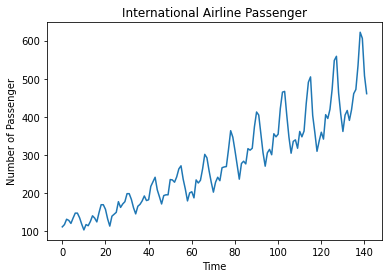

In [ ]:
dataset = data.iloc[:,1].values #month sütunu numpy array'e çevrilir.
plt.plot(dataset)
plt.xlabel("Time")
plt.ylabel("Number of Passenger")
plt.title("International Airline Passenger")
plt.show()

Yaz aylarında yolcu sayısı artıp kış aylarında azalmıştır.

Datanın bir kısmı train olarak alınıp geleceğe yönelik prediction yapılacaktır.

**Preprocessing Data**

*   reshape
*   change type
*   scaling
*   train test split
*   Create dataset


In [ ]:
dataset.shape

(142,)

Month feature'ının tek bir sütundan oluştuğu pandasa bildirilmelidir.

In [ ]:
dataset = dataset.reshape(-1,1)

In [ ]:
dataset = dataset.astype("float32") #samplelar float32 türüne çevrilir.
dataset.shape

(142, 1)

In [ ]:
#MinMaxScaler = X-Xmin / Xmax-Xmin
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

Bütün samplelar 0-1 aralığına çekilerek normalization yapılır

In [ ]:
train_size = int(len(dataset) * 0.50)
test_size = len(dataset) - train_size
train = dataset[0:train_size,:]
test = dataset[train_size:len(dataset),:]
print("train size: {}, test size: {} ".format(len(train), len(test)))

train size: 71, test size: 71 


Datanın  %50'si train datası, %50'si test datası olarak kullanılacaktır.

In [ ]:
time_stemp = 10
dataX = []
dataY = []
for i in range(len(train)-time_stemp-1):
    a = train[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(train[i + time_stemp, 0])
x_train = numpy.array(dataX)
y_train = numpy.array(dataY)  

train datasındaki sample sayısı az olduğu için timestemp 10 yapılmıştır.

train datasındaki ilk 10 sample x_train'e atanır, 11. sample y_train'e atanır.

Daha sonra bir kayarak 10 sample x_train'e atanır,12. sample y_train'e atanır.

Böylelikle x_train ve y_train oluşturulmuş olur.

In [ ]:
dataX = []
dataY = []
for i in range(len(test)-time_stemp-1):
    a = test[i:(i+time_stemp), 0]
    dataX.append(a)
    dataY.append(test[i + time_stemp, 0])
x_test = numpy.array(dataX)
y_test = numpy.array(dataY)  

x_test ve y_test oluşturmak için de aynı işlem uygulanır.

In [ ]:
x_train = numpy.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = numpy.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))

In [ ]:
x_train.shape

(60, 1, 10)

Datasetler 3 boyutlu yapılır, çünkü Keras kütüphanesi 3 boyutlu çalışmak istemektedir.

In [ ]:
# model
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout 
from sklearn.metrics import mean_squared_error

model = Sequential()

model.add(LSTM(100, input_shape=(1, time_stemp))) # 100 lstm node'undan oluşur.
#activation function default olarak tanh'dır.
#recurrent_activation default olarak sigmoid'dir.
model.add(Dense(1)) #1 LSTM layer'dan oluşur.

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=60, batch_size=5)

Epoch 1/60
12/12 [==============================] - 2s 2ms/step - loss: 0.0202
Epoch 2/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0053
Epoch 3/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 4/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 5/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 6/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 7/60
12/12 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 8/60
12/12 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/60
12/12 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 10/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 11/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 12/60
12/12 [==============================] - 0s 2ms/step - loss: 0.0024
Epoch 13/60
12/12 [==============================

x_train datasında 61 sample bulunmaktadır.

batch size 5,

60/5 = 12 batch,

Her epoch'ta 13 defa forward backward propagation yapılır.

In [ ]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

#normalization yapılan samplelar asıl değerlerine getirilir.
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

#root mean squared error hesabı
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 16.61 RMSE
Test Score: 36.73 RMSE


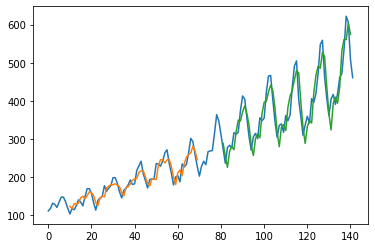

In [ ]:
# shifting train
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[time_stemp:len(trainPredict)+time_stemp, :] = trainPredict
# shifting test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(time_stemp*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

Mavi line datada bulunan samplelardır.

Turuncu line train datası ile yapılan prediction'dır.

Yeşil line ise gelecek zaman için yapılan prediction'dır.

Gelecek için yapılan tahminde modelin artış azalışları gerçek datayla hemen hemen uyumludur.
